## 用决策树模型完成分类问题

#### 把需要的工具库import进来

In [26]:
import pandas as pd
from sklearn import preprocessing
from sklearn import tree

#### 读取数据

In [27]:
adult_data = pd.read_csv('./data/DecisionTree.csv')

In [28]:
# 读取前5行
adult_data.head(5)

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [29]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 9 columns):
workclass         32561 non-null object
education         32561 non-null object
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
gender            32561 non-null object
native-country    32561 non-null object
income            32561 non-null object
dtypes: object(9)
memory usage: 2.2+ MB


In [30]:
adult_data.shape

(32561, 9)

In [31]:
adult_data.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

#### 区分一下特征和目标

In [32]:
feature_columns = ['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country']
label_column = ['income']

In [33]:
features = adult_data[feature_columns]
label = adult_data[label_column]

In [34]:
features.head(2)

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States


In [35]:
label.head(2)

,income
0,<=50K
1,<=50K


#### 特征处理

In [11]:
help(pd.get_dummies)

Help on function get_dummies in module pandas.core.reshape.reshape:

get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
    Convert categorical variable into dummy/indicator variables
    
    Parameters
    ----------
    data : array-like, Series, or DataFrame
    prefix : string, list of strings, or dict of strings, default None
        String to append DataFrame column names.
        Pass a list with length equal to the number of columns
        when calling get_dummies on a DataFrame. Alternatively, `prefix`
        can be a dictionary mapping column names to prefixes.
    prefix_sep : string, default '_'
        If appending prefix, separator/delimiter to use. Or pass a
        list or dictionary as with `prefix.`
    dummy_na : bool, default False
        Add a column to indicate NaNs, if False NaNs are ignored.
    columns : list-like, default None
        Column names in the DataFrame to be encoded.
        

In [38]:
# pd.get_dummies 相当于对类别特征 one-hot 编码
features = pd.get_dummies(features)

In [39]:
features.head(2)

,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### 构建模型

In [14]:
help(tree.DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree.tree:

class DecisionTreeClassifier(BaseDecisionTree, sklearn.base.ClassifierMixin)
 |  DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : string, optional (default="gini")
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : string, optional (default="best")
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.

In [66]:
# 初始化一个决策树分类器, 使用信息增益作为特征选择指标
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=4)
# 拟合数据
clf = clf.fit(features, label)

In [67]:
# 在训练数据上预测
clf.predict(features)

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

### 可视化决策树


In [43]:
%pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [44]:
import pydotplus

In [45]:
from IPython.display import display, Image

In [68]:
dot_dat = tree.export_graphviz(clf,
                               out_file=None,
                               feature_names=features.columns,
                               class_names = ['<=50k', '>50k'],
                               filled = True,
                               rounded =True
                              )

In [69]:
import os
 
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

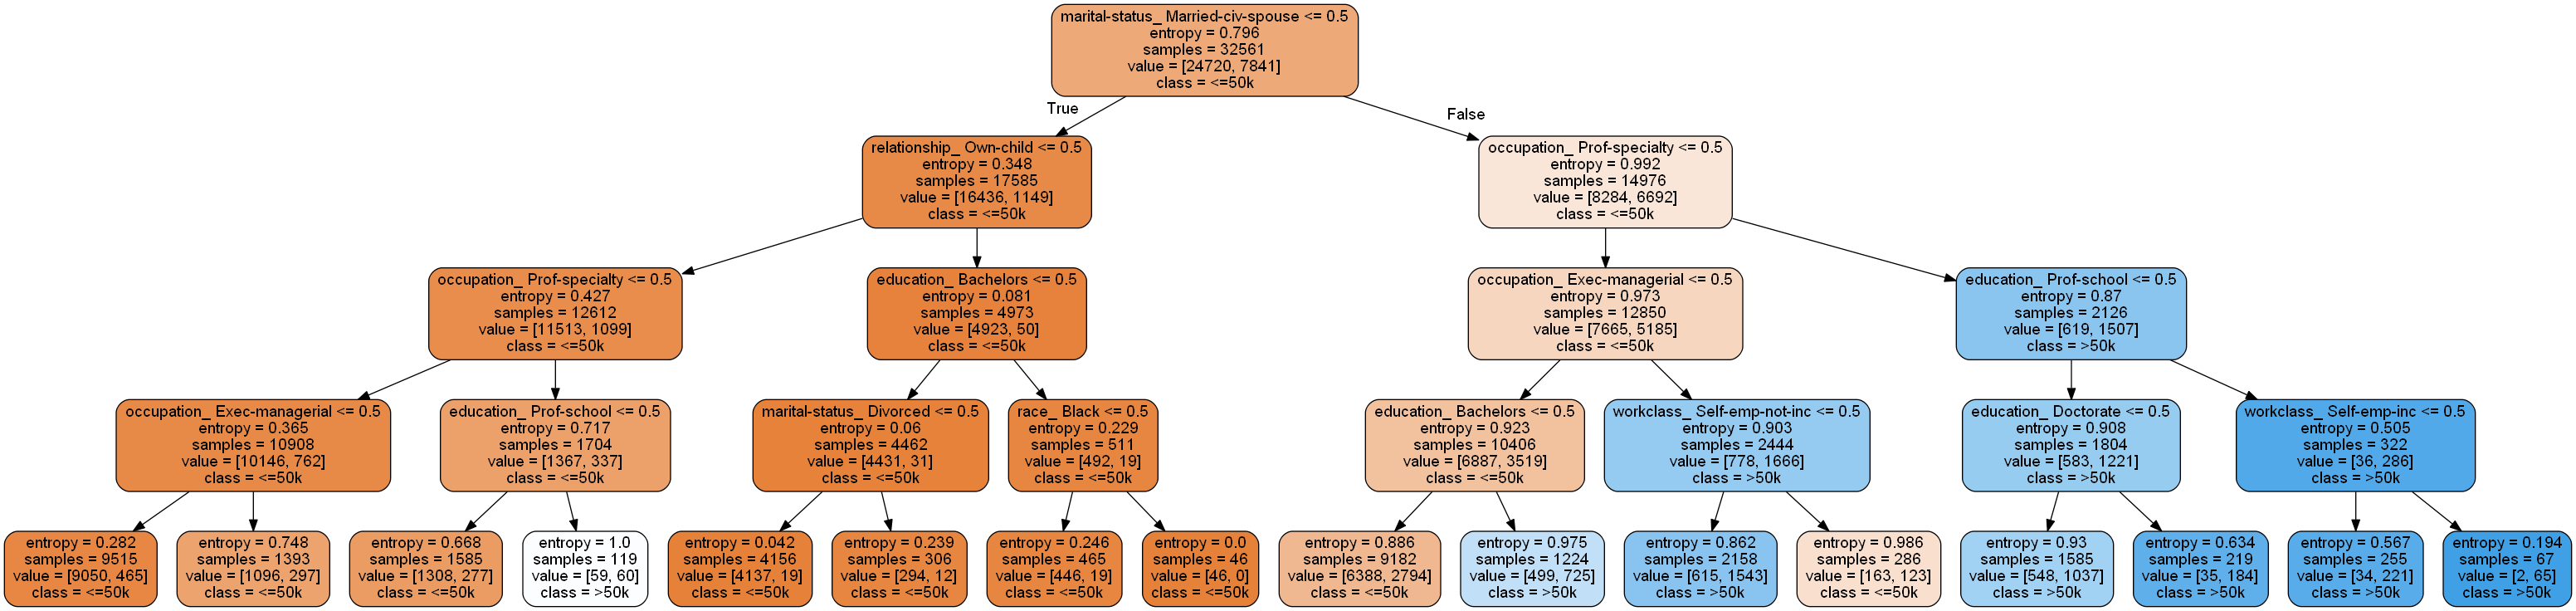

In [70]:
graph = pydotplus.graph_from_dot_data(dot_dat)
display(Image(graph.create_png()))

### 分类决策树如何处理类别特征实验

In [72]:
# 初始化一个决策树分类器, 使用信息增益作为特征选择指标
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=4)
# 拟合数据
clf = clf.fit(np.array([[0,2,0],[1,2,1],[2,3,5]]), np.array([1,0,1]))

In [73]:
clf.predict(np.array([[0,1,0]]))

array([1])

In [74]:
dot_dat = tree.export_graphviz(clf,
                               out_file=None,
                               feature_names=['f1','f2','f3'],
                               class_names = ['0','1'],
                               filled = True,
                               rounded =True
                              )

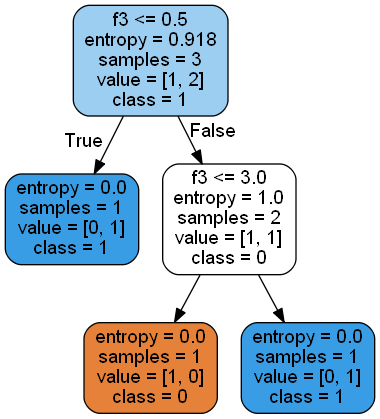

In [75]:
graph = pydotplus.graph_from_dot_data(dot_dat)
display(Image(graph.create_png()))

可以看到 sklearn 中实现的分类决策树是 CART 树，是二叉树，对于离散值还是按连续值处理的，这样的作为会默认离散值的数值有意义，决策树特征选择时会按照数值排序切分。所以对于类别特征一般都需要做处理
- one-hot: 失去数值意义，标记类别
- label encoding：以有意义的数值来代替类别特征，比如以人均消费代替城市类别

参考：
https://scikit-learn.org/stable/modules/tree.html#tree

其中有描述 scikit-learn uses an optimised version of the CART algorithm; however, scikit-learn implementation does not support categorical variables for now.